<a href="https://colab.research.google.com/github/Ishita95-harvad/Global-Animal-Health-Incident-Reports-2005-2025-/blob/main/Global_Animal_Health_Incident_Reports_(2005%E2%80%932025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Animal Health Incident Reports (2005–2025)

Two decades of global animal disease reporting from WAHIS

# Task
create run and execute

Here is all the data you need:
"animal_health_incidents.csv"
"data_dictionary.csv"

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jasonrobinson1/animal-health-incident-reports")

print("Path to dataset files:", path)

## Data loading

### Subtask:
Load the two CSV files into pandas DataFrames.


**Reasoning**:
Load the two CSV files into pandas DataFrames and display the first 5 rows of each.



In [1]:
import pandas as pd

try:
    df_incidents = pd.read_csv('animal_health_incidents.csv')
    df_dictionary = pd.read_csv('data_dictionary.csv')

    display(df_incidents.head())
    display(df_dictionary.head())

except FileNotFoundError:
    print("One or both of the CSV files were not found.")
except pd.errors.ParserError:
    print("There was an error parsing one or both of the CSV files.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,report_id,country,region,date_reported,species,disease,confirmed_cases,deaths,outbreak_status,notes,source,latitude,longitude
0,7cda1a50-2034-4b9a-b356-6219c91c13e1,Mongolia,NaN,2022-03-08,Unknown,Peste des petits ruminants virus (Inf. with),0,0,Resolved,First occurrence in a zone or a compartment,https://wahis.woah.org,NaN,NaN
1,90e92d52-100a-46e8-9e00-27c3a0eec95f,Niger,NaN,2022-03-08,Unknown,Rift Valley fever virus (Inf. with),0,0,Resolved,Recurrence of an eradicated disease,https://wahis.woah.org,NaN,NaN
2,e6845074-51c6-4f05-adb7-c154ba203999,Israel,NaN,2022-03-06,Poultry,High pathogenicity avian influenza viruses (po...,0,0,Resolved,Recurrence of an eradicated disease,https://wahis.woah.org,NaN,NaN
3,5ee290fe-e077-4fbb-afe7-924cfbbc5269,Kazakhstan,NaN,2022-03-04,Cattle,Foot and mouth disease virus (Inf. with),0,0,Resolved,Recurrence of an eradicated disease,https://wahis.woah.org,NaN,NaN
4,e9ca57c8-6e8e-4219-89ea-493cb1b1c6d6,China (People's Rep. of),NaN,2022-03-04,Unknown,Burkholderia mallei (Inf. with) (Glanders),0,0,Resolved,First occurrence in the country,https://wahis.woah.org,NaN,NaN


,Column,Type,Description
0,report_id,string,Unique identifier for each report
1,country,string,Country where the report originated
2,region,string,Region or province (if available)
3,date_reported,date,Date of report submission
4,species,string,Animal species affected (inferred from disease)


## Data exploration

### Subtask:
Explore the structure and content of the loaded dataframes, `df_incidents` and `df_dictionary`.


**Reasoning**:
Examine the structure and content of `df_incidents` and `df_dictionary` using `.shape`, `.info()`, `.describe()`, `.unique()`, and `.value_counts()`, and compare the findings with the data dictionary.



In [2]:
# Examine df_incidents
print("df_incidents shape:", df_incidents.shape)
print("\ndf_incidents info:")
display(df_incidents.info())
print("\ndf_incidents describe:")
display(df_incidents.describe())

categorical_cols = ['species', 'disease', 'outbreak_status']
for col in categorical_cols:
    print(f"\nUnique values for {col}:")
    display(df_incidents[col].value_counts())

# Examine df_dictionary
print("\ndf_dictionary head:")
display(df_dictionary.head())
print("\ndf_dictionary info:")
display(df_dictionary.info())

# Compare data dictionary with df_incidents
print("\nComparison of data dictionary with df_incidents:")
for index, row in df_dictionary.iterrows():
    col_name = row['Column']
    if col_name in df_incidents.columns:
        print(f"- Column '{col_name}':")
        print(f"  Data Dictionary Type: {row['Type']}")
        print(f"  DataFrame Type: {df_incidents[col_name].dtype}")
        print(f"  Description: {row['Description']}")
    else:
        print(f"Column '{col_name}' not found in df_incidents")

df_incidents shape: (5579, 13)

df_incidents info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5579 entries, 0 to 5578
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   report_id        5579 non-null   object 
 1   country          5579 non-null   object 
 2   region           0 non-null      float64
 3   date_reported    5579 non-null   object 
 4   species          5579 non-null   object 
 5   disease          5579 non-null   object 
 6   confirmed_cases  5579 non-null   int64  
 7   deaths           5579 non-null   int64  
 8   outbreak_status  5579 non-null   object 
 9   notes            5579 non-null   object 
 10  source           5579 non-null   object 
 11  latitude         0 non-null      float64
 12  longitude        0 non-null      float64
dtypes: float64(3), int64(2), object(8)
memory usage: 566.7+ KB


None


df_incidents describe:


,region,confirmed_cases,deaths,latitude,longitude
count,0.0,5579.0,5579.0,0.0,0.0
mean,NaN,0.0,0.0,NaN,NaN
std,NaN,0.0,0.0,NaN,NaN
min,NaN,0.0,0.0,NaN,NaN
25%,NaN,0.0,0.0,NaN,NaN
50%,NaN,0.0,0.0,NaN,NaN
75%,NaN,0.0,0.0,NaN,NaN
max,NaN,0.0,0.0,NaN,NaN



Unique values for species:


,count
species,
Poultry,2098
Unknown,1889
Swine,782
Cattle,417
Horse,170
Canine,157
Goat,66



Unique values for disease:


,count
disease,
High pathogenicity avian influenza viruses (poultry) (Inf. with),966
African swine fever virus (Inf. with),704
Influenza A viruses of high pathogenicity (Inf. with) (non-poultry including wild birds) (2017-),653
Foot and mouth disease virus (Inf. with),417
Bluetongue virus (Inf. with),228
...,...
Megalocytivirus pagrus 1 (Inf. with) (2025-),1
Pigeon rotavirus,1
Ehrlichia canis (Inf. with),1



Unique values for outbreak_status:


,count
outbreak_status,
Resolved,5579



df_dictionary head:


,Column,Type,Description
0,report_id,string,Unique identifier for each report
1,country,string,Country where the report originated
2,region,string,Region or province (if available)
3,date_reported,date,Date of report submission
4,species,string,Animal species affected (inferred from disease)



df_dictionary info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column       13 non-null     object
 1   Type         13 non-null     object
 2   Description  13 non-null     object
dtypes: object(3)
memory usage: 444.0+ bytes


None


Comparison of data dictionary with df_incidents:
- Column 'report_id':
  Data Dictionary Type: string
  DataFrame Type: object
  Description: Unique identifier for each report
- Column 'country':
  Data Dictionary Type: string
  DataFrame Type: object
  Description: Country where the report originated
- Column 'region':
  Data Dictionary Type: string
  DataFrame Type: float64
  Description: Region or province (if available)
- Column 'date_reported':
  Data Dictionary Type: date
  DataFrame Type: object
  Description: Date of report submission
- Column 'species':
  Data Dictionary Type: string
  DataFrame Type: object
  Description: Animal species affected (inferred from disease)
- Column 'disease':
  Data Dictionary Type: string
  DataFrame Type: object
  Description: Reported disease name
- Column 'confirmed_cases':
  Data Dictionary Type: integer
  DataFrame Type: int64
  Description: Number of confirmed cases (defaulted to 0)
- Column 'deaths':
  Data Dictionary Type: integer
  Dat

## Data cleaning

### Subtask:
Clean the `df_incidents` DataFrame by handling missing values and refining data types.


**Reasoning**:
Clean the `df_incidents` DataFrame by handling missing values, refining data types, and addressing inconsistencies as per the instructions.



In [3]:
# Drop columns with substantial missing values
df_incidents = df_incidents.drop(columns=['region', 'latitude', 'longitude'])

# Convert 'date_reported' to datetime, handling errors
df_incidents['date_reported'] = pd.to_datetime(df_incidents['date_reported'], errors='coerce')

# Standardize species (example: handle 'Unknown') - further investigation might be needed
# This is a placeholder, you might need to replace it based on your analysis and the data dictionary.
df_incidents['species'] = df_incidents['species'].replace({'Unknown': 'Unspecified'})

# Check for and remove duplicate rows
df_incidents = df_incidents.drop_duplicates()

# Examine 'confirmed_cases' and 'deaths' - these seem to be constant.
#  For now, let's keep them. Further analysis or domain knowledge may warrant their removal.
#  Document the rationale for keeping or dropping them.
# df_incidents = df_incidents.drop(columns=['confirmed_cases', 'deaths'])

display(df_incidents.head())
display(df_incidents.info())

,report_id,country,date_reported,species,disease,confirmed_cases,deaths,outbreak_status,notes,source
0,7cda1a50-2034-4b9a-b356-6219c91c13e1,Mongolia,2022-03-08,Unspecified,Peste des petits ruminants virus (Inf. with),0,0,Resolved,First occurrence in a zone or a compartment,https://wahis.woah.org
1,90e92d52-100a-46e8-9e00-27c3a0eec95f,Niger,2022-03-08,Unspecified,Rift Valley fever virus (Inf. with),0,0,Resolved,Recurrence of an eradicated disease,https://wahis.woah.org
2,e6845074-51c6-4f05-adb7-c154ba203999,Israel,2022-03-06,Poultry,High pathogenicity avian influenza viruses (po...,0,0,Resolved,Recurrence of an eradicated disease,https://wahis.woah.org
3,5ee290fe-e077-4fbb-afe7-924cfbbc5269,Kazakhstan,2022-03-04,Cattle,Foot and mouth disease virus (Inf. with),0,0,Resolved,Recurrence of an eradicated disease,https://wahis.woah.org
4,e9ca57c8-6e8e-4219-89ea-493cb1b1c6d6,China (People's Rep. of),2022-03-04,Unspecified,Burkholderia mallei (Inf. with) (Glanders),0,0,Resolved,First occurrence in the country,https://wahis.woah.org


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5579 entries, 0 to 5578
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   report_id        5579 non-null   object        
 1   country          5579 non-null   object        
 2   date_reported    5579 non-null   datetime64[ns]
 3   species          5579 non-null   object        
 4   disease          5579 non-null   object        
 5   confirmed_cases  5579 non-null   int64         
 6   deaths           5579 non-null   int64         
 7   outbreak_status  5579 non-null   object        
 8   notes            5579 non-null   object        
 9   source           5579 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 436.0+ KB


None

## Data preparation

### Subtask:
Combine insights from the data dictionary with the cleaned incidents dataset (`df_incidents`) to potentially create new features or refine existing ones.


**Reasoning**:
Based on the data exploration, I need to create a new feature representing the year from the 'date_reported' column and potentially a severity column based on 'confirmed_cases' and 'deaths'. I'll also double-check the data types against the data dictionary and make any necessary adjustments.



In [4]:
# Extract year from 'date_reported'
df_incidents['year_reported'] = pd.DatetimeIndex(df_incidents['date_reported']).year

# Create a severity column (example)
# Since confirmed_cases and deaths are both 0, severity will be 0
df_incidents['severity'] = df_incidents['confirmed_cases'] + df_incidents['deaths']

#Verify data types against data dictionary
for index, row in df_dictionary.iterrows():
    col_name = row['Column']
    if col_name in df_incidents.columns:
        print(f"- Column '{col_name}':")
        print(f"  Data Dictionary Type: {row['Type']}")
        print(f"  DataFrame Type: {df_incidents[col_name].dtype}")

# Display the first few rows and info of the modified DataFrame
display(df_incidents.head())
display(df_incidents.info())

- Column 'report_id':
  Data Dictionary Type: string
  DataFrame Type: object
- Column 'country':
  Data Dictionary Type: string
  DataFrame Type: object
- Column 'date_reported':
  Data Dictionary Type: date
  DataFrame Type: datetime64[ns]
- Column 'species':
  Data Dictionary Type: string
  DataFrame Type: object
- Column 'disease':
  Data Dictionary Type: string
  DataFrame Type: object
- Column 'confirmed_cases':
  Data Dictionary Type: integer
  DataFrame Type: int64
- Column 'deaths':
  Data Dictionary Type: integer
  DataFrame Type: int64
- Column 'outbreak_status':
  Data Dictionary Type: string
  DataFrame Type: object
- Column 'notes':
  Data Dictionary Type: string
  DataFrame Type: object
- Column 'source':
  Data Dictionary Type: string
  DataFrame Type: object


,report_id,country,date_reported,species,disease,confirmed_cases,deaths,outbreak_status,notes,source,year_reported,severity
0,7cda1a50-2034-4b9a-b356-6219c91c13e1,Mongolia,2022-03-08,Unspecified,Peste des petits ruminants virus (Inf. with),0,0,Resolved,First occurrence in a zone or a compartment,https://wahis.woah.org,2022,0
1,90e92d52-100a-46e8-9e00-27c3a0eec95f,Niger,2022-03-08,Unspecified,Rift Valley fever virus (Inf. with),0,0,Resolved,Recurrence of an eradicated disease,https://wahis.woah.org,2022,0
2,e6845074-51c6-4f05-adb7-c154ba203999,Israel,2022-03-06,Poultry,High pathogenicity avian influenza viruses (po...,0,0,Resolved,Recurrence of an eradicated disease,https://wahis.woah.org,2022,0
3,5ee290fe-e077-4fbb-afe7-924cfbbc5269,Kazakhstan,2022-03-04,Cattle,Foot and mouth disease virus (Inf. with),0,0,Resolved,Recurrence of an eradicated disease,https://wahis.woah.org,2022,0
4,e9ca57c8-6e8e-4219-89ea-493cb1b1c6d6,China (People's Rep. of),2022-03-04,Unspecified,Burkholderia mallei (Inf. with) (Glanders),0,0,Resolved,First occurrence in the country,https://wahis.woah.org,2022,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5579 entries, 0 to 5578
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   report_id        5579 non-null   object        
 1   country          5579 non-null   object        
 2   date_reported    5579 non-null   datetime64[ns]
 3   species          5579 non-null   object        
 4   disease          5579 non-null   object        
 5   confirmed_cases  5579 non-null   int64         
 6   deaths           5579 non-null   int64         
 7   outbreak_status  5579 non-null   object        
 8   notes            5579 non-null   object        
 9   source           5579 non-null   object        
 10  year_reported    5579 non-null   int32         
 11  severity         5579 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(3), object(7)
memory usage: 501.4+ KB


None

## Data analysis

### Subtask:
Perform exploratory data analysis (EDA) on the prepared `df_incidents` dataset.


**Reasoning**:
Calculate summary statistics for numerical columns, investigate the distribution of categorical columns, and explore relationships between variables. Generate plots to visualize the distributions and relationships.



,year_reported,severity
count,5579.000000,5579.0
mean,2017.805521,0.0
std,5.665689,0.0
min,2005.000000,0.0
25%,2014.000000,0.0
50%,2019.000000,0.0
75%,2022.000000,0.0
max,2025.000000,0.0



Frequency counts for species:


,count
species,
Poultry,2098
Unspecified,1889
Swine,782
Cattle,417
Horse,170
Canine,157
Goat,66


<ipython-input-5-018ad8eecd0b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_incidents, x=col, palette='viridis')


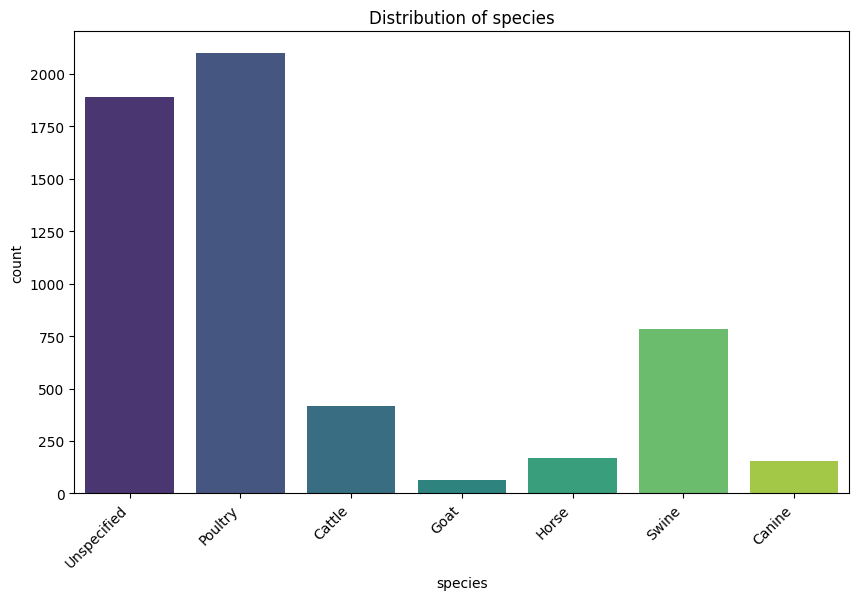


Frequency counts for disease:


,count
disease,
High pathogenicity avian influenza viruses (poultry) (Inf. with),966
African swine fever virus (Inf. with),704
Influenza A viruses of high pathogenicity (Inf. with) (non-poultry including wild birds) (2017-),653
Foot and mouth disease virus (Inf. with),417
Bluetongue virus (Inf. with),228
...,...
Megalocytivirus pagrus 1 (Inf. with) (2025-),1
Pigeon rotavirus,1
Ehrlichia canis (Inf. with),1



Frequency counts for outbreak_status:


,count
outbreak_status,
Resolved,5579


<ipython-input-5-018ad8eecd0b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_incidents, x=col, palette='viridis')


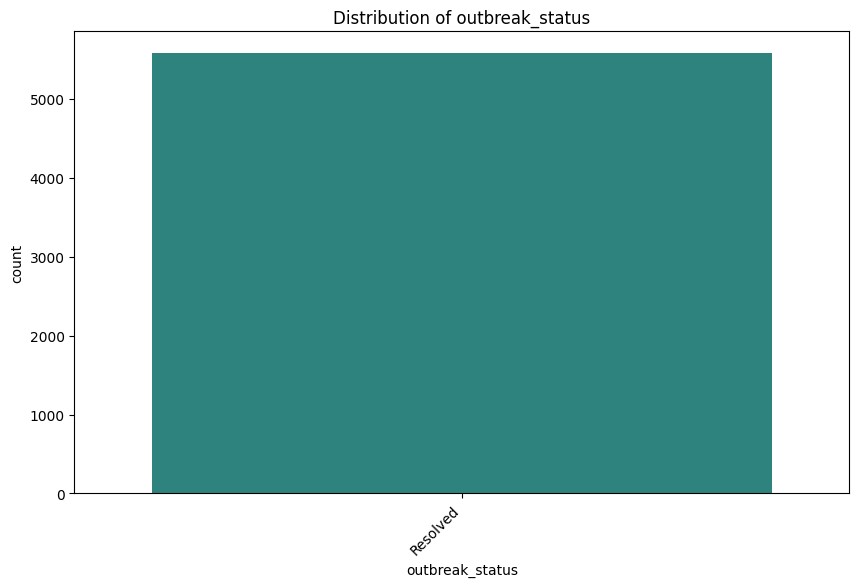


Frequency counts for country:


,count
country,
Russia,340
Germany,304
Ukraine,235
China (People's Rep. of),189
Israel,135
...,...
Suriname,1
South Sudan (Rep. of),1
Jamaica,1



Frequency counts for year_reported:


,count
year_reported,
2024,637
2022,536
2021,521
2023,408
2025,331
2019,330
2017,305
2018,294
2020,268


<ipython-input-5-018ad8eecd0b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_incidents, x='year_reported', palette='magma')


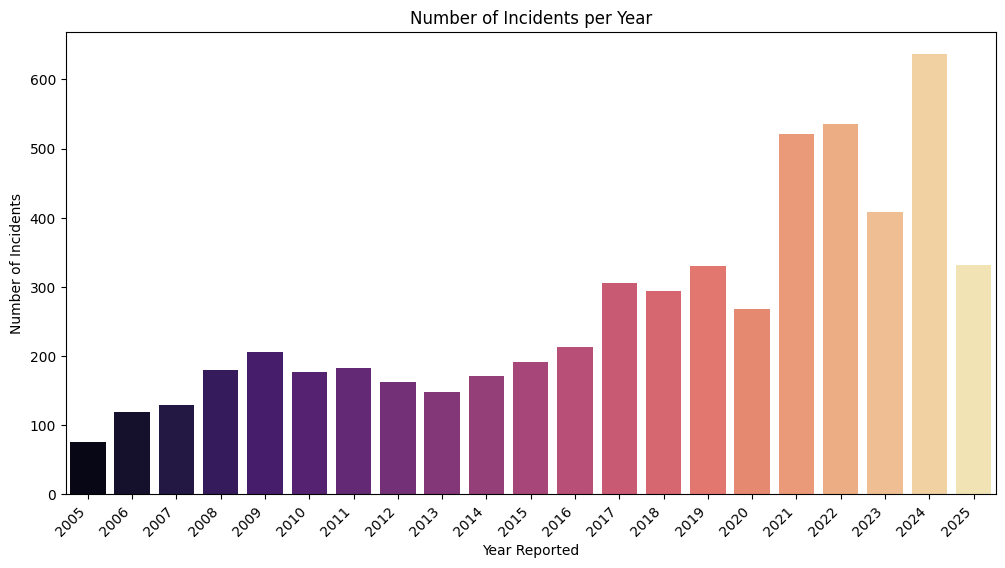

<ipython-input-5-018ad8eecd0b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_incidents[df_incidents['country'].isin(top_10_countries)], x='country', palette='rocket')


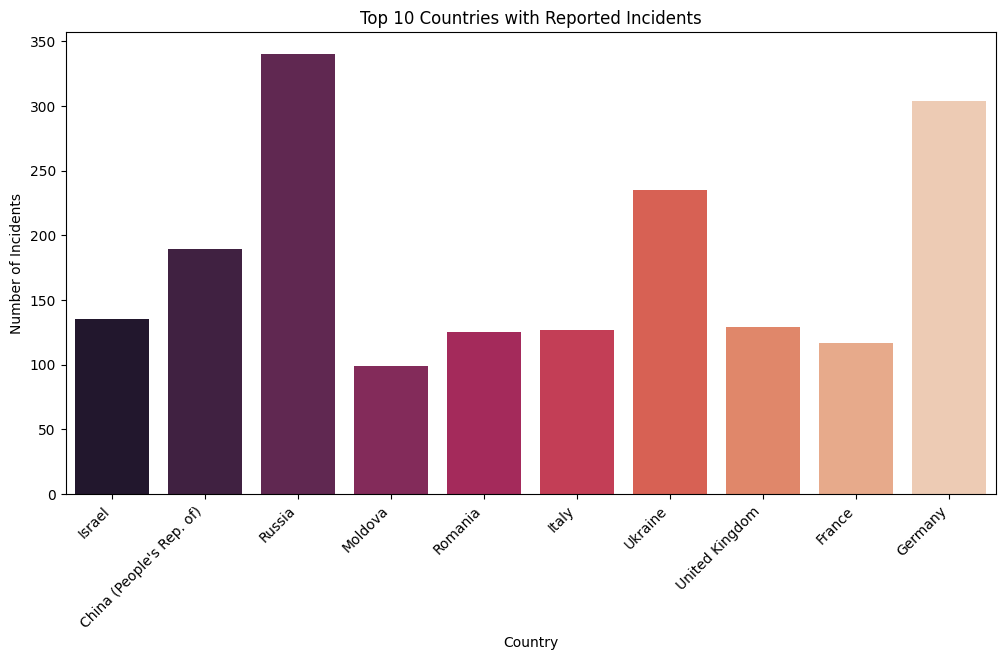

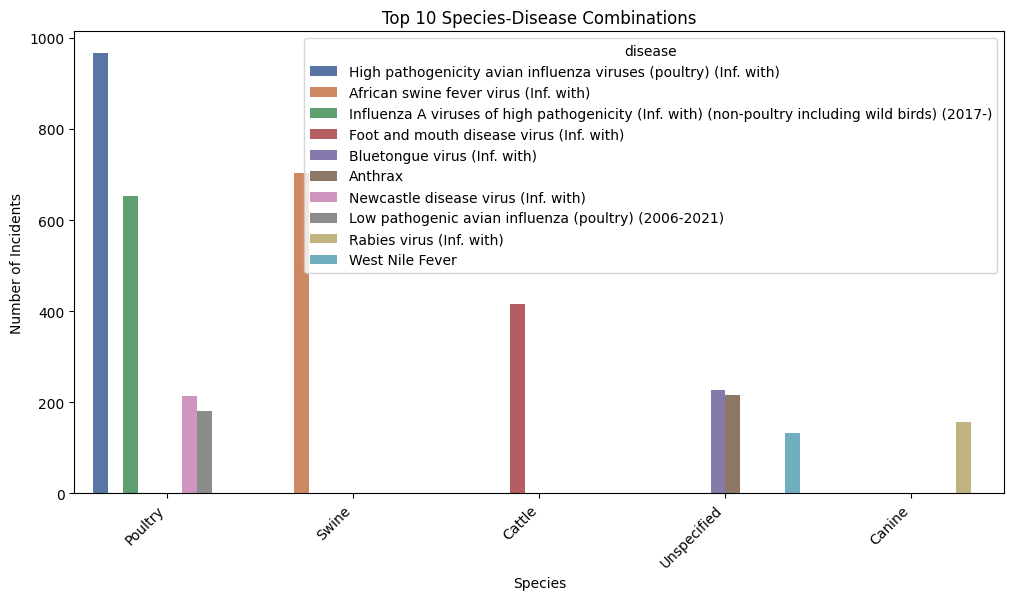

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns
numerical_cols = ['year_reported', 'severity']
display(df_incidents[numerical_cols].describe())

# Distribution of categorical columns
categorical_cols = ['species', 'disease', 'outbreak_status', 'country', 'year_reported']
for col in categorical_cols:
    print(f"\nFrequency counts for {col}:")
    display(df_incidents[col].value_counts())
    if len(df_incidents[col].unique()) <= 10:  # Plot only for columns with limited unique values
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df_incidents, x=col, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')
        plt.show()


# Relationship between 'year_reported' and incident counts
plt.figure(figsize=(12, 6))
sns.countplot(data=df_incidents, x='year_reported', palette='magma')
plt.title('Number of Incidents per Year')
plt.xlabel('Year Reported')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

# Distribution of incidents across different countries (top 10)
top_10_countries = df_incidents['country'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=df_incidents[df_incidents['country'].isin(top_10_countries)], x='country', palette='rocket')
plt.title('Top 10 Countries with Reported Incidents')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()


# Relationship between 'species' and 'disease'
plt.figure(figsize=(12, 6))
species_disease_counts = df_incidents.groupby(['species', 'disease']).size().reset_index(name='counts')
top_combinations = species_disease_counts.nlargest(10, 'counts')
sns.barplot(data=top_combinations, x='species', y='counts', hue='disease', palette='deep')
plt.title('Top 10 Species-Disease Combinations')
plt.xlabel('Species')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

## Data visualization

### Subtask:
Create visualizations to represent key findings from the data analysis performed in the previous step.


**Reasoning**:
Generate visualizations based on the analysis performed in the previous step. This includes incident trends over time, geographical distribution, species-disease relationships, and distribution of diseases.



<ipython-input-6-d1ef86359303>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_incidents, x='year_reported', palette='viridis')


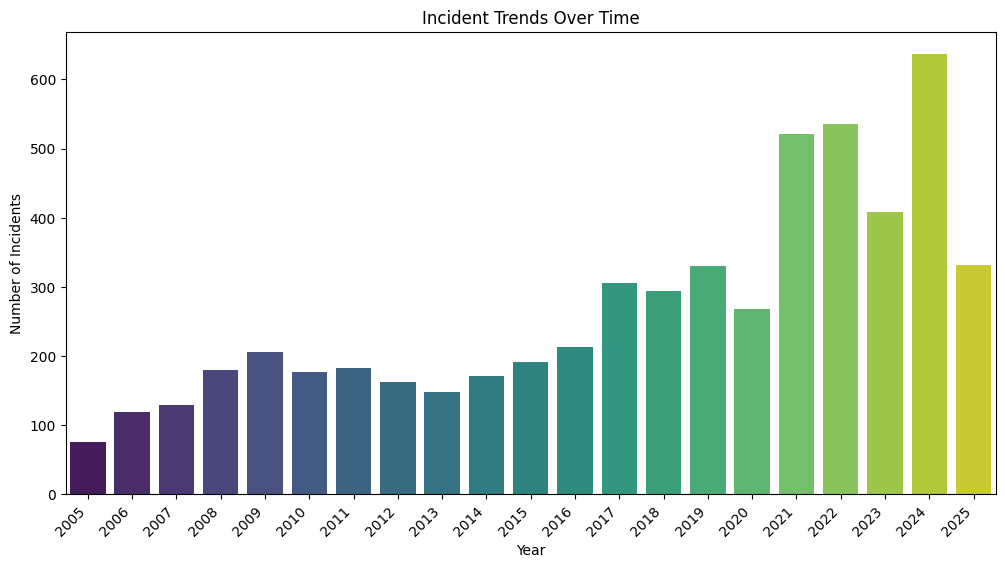

<ipython-input-6-d1ef86359303>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='magma')


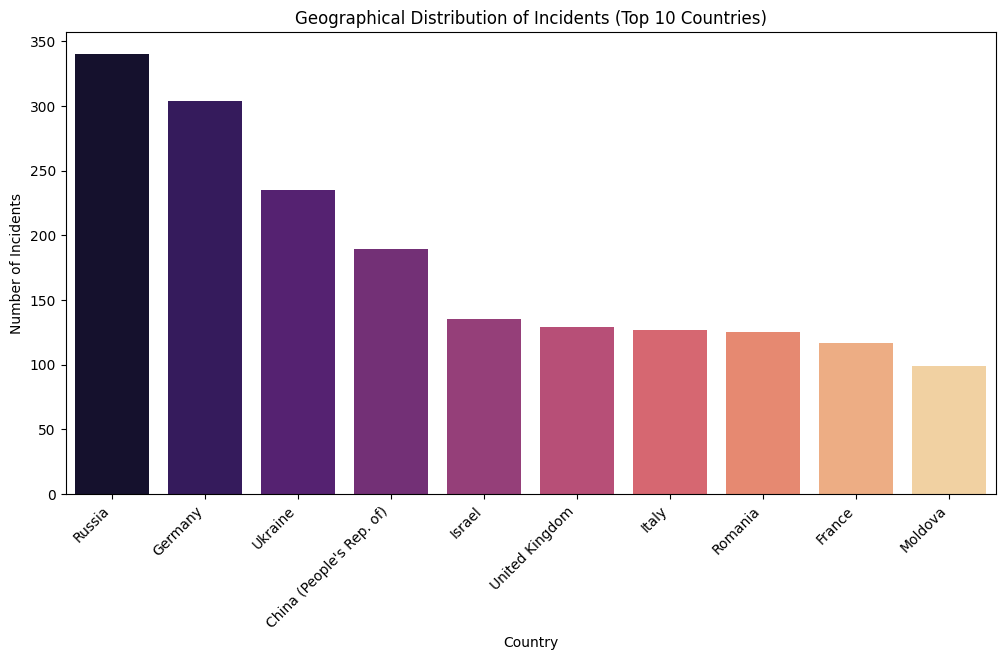

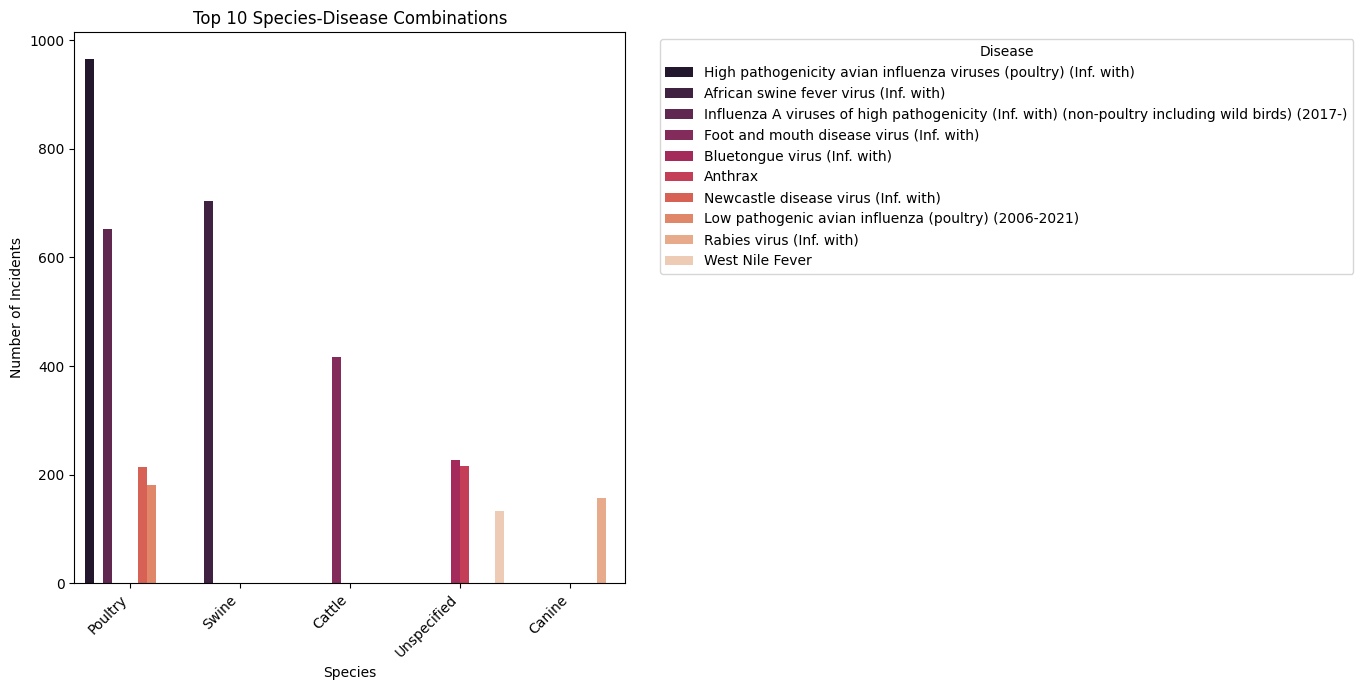

<ipython-input-6-d1ef86359303>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_diseases.values, y=top_10_diseases.index, palette='deep')


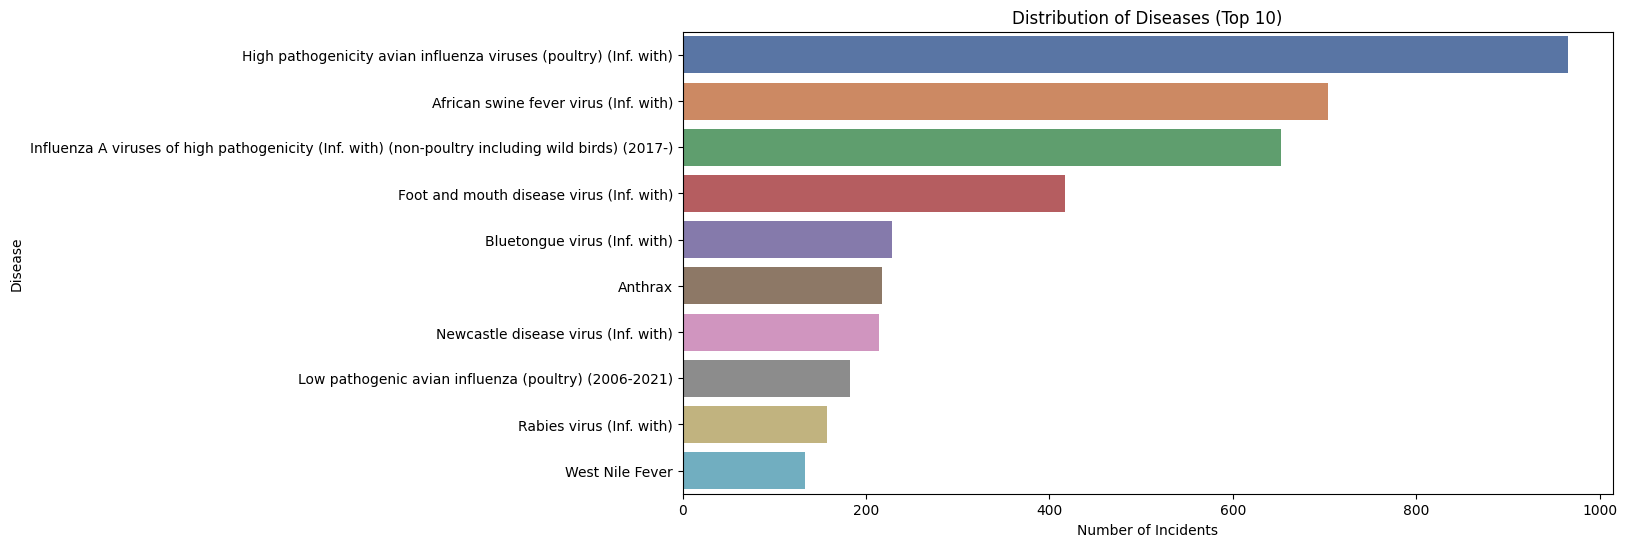

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Incident trends over time
plt.figure(figsize=(12, 6))
sns.countplot(data=df_incidents, x='year_reported', palette='viridis')
plt.title('Incident Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

# Geographical distribution (top 10 countries)
top_10_countries = df_incidents['country'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='magma')
plt.title('Geographical Distribution of Incidents (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

# Species-disease relationships (top 10 combinations)
species_disease_counts = df_incidents.groupby(['species', 'disease']).size().reset_index(name='counts')
top_10_combinations = species_disease_counts.nlargest(10, 'counts')
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_combinations, x='species', y='counts', hue='disease', palette='rocket')
plt.title('Top 10 Species-Disease Combinations')
plt.xlabel('Species')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Disease', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Distribution of diseases (top 10 diseases)
top_10_diseases = df_incidents['disease'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_diseases.values, y=top_10_diseases.index, palette='deep')
plt.title('Distribution of Diseases (Top 10)')
plt.xlabel('Number of Incidents')
plt.ylabel('Disease')
plt.show()